# Task3: Geographic Analysis 

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas
from geodatasets import get_path
import folium
from folium.plugins import HeatMap

In [16]:
dt = pd.read_csv('restaurants.csv')

### Plot the locations of restaurants on a map using longitude and latitude coordinates.

In [20]:
print(dt[["Longitude","Latitude"]])

       Longitude   Latitude
0     121.027535  14.565443
1     121.014101  14.553708
2     121.056831  14.581404
3     121.056475  14.585318
4     121.057508  14.584450
...          ...        ...
9546   28.977392  41.022793
9547   29.041297  41.009847
9548   29.034640  41.055817
9549   29.036019  41.057979
9550   29.026016  40.984776

[9551 rows x 2 columns]


In [27]:
gdt=geopandas.GeoDataFrame(
dt,geometry=geopandas.points_from_xy(dt.Longitude,dt.Latitude),crs="EPSG:4326"
)
print(gdt.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

<Axes: >

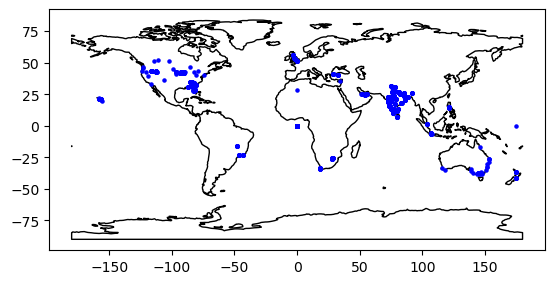

In [34]:
world=geopandas.read_file(get_path("naturalearth.land"))
ax=world.plot(color="white",edgecolor='black')
gdt.plot(ax=ax,marker='o',color='blue',markersize=5)

In [35]:
plt.show()

### Identify any patterns or clusters of restaurants in specific areas.

In [46]:
world_map=folium.Map(location=[dt['Latitude'].mean(),dt['Longitude'].mean()],zoom_start=1,height="100%",width='100%',color="red")

In [47]:
heat_marker=[[row['Latitude'],row['Longitude']] for i, row in dt.iterrows()] 
HeatMap(heat_marker,radius=10).add_to(world_map)

In [48]:
world_map